In [1]:
import pandas as pd

In [2]:
A=pd.read_csv('database_AUS.csv')
B=pd.read_csv('database_IND.csv')
c=pd.read_csv('database_USA.csv')

In [3]:
cp_merged = pd.merge(A,B,left_index=True, right_index=True)

In [4]:
cp_merged = pd.merge(cp_merged,c,left_index=True,right_index=True,how ='outer' )

In [5]:
GP=cp_merged

In [6]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [7]:
print('No of Rows:',GP.shape[0])
print('No of Columns:',GP.shape[1])
GP.head()

No of Rows: 11879
No of Columns: 81


country_x country_long_x                 name_x gppd_idnr_x  capacity_mw_x  \
0       AUS      Australia       Adelaide Airport  AUS0000433           0.11   
1       AUS      Australia   Adelaide Showgrounds  AUS0000432           1.00   
2       AUS      Australia       Albany Wind Farm  AUS0000065          21.60   
3       AUS      Australia  Alice Springs Airport  AUS0000469           0.24   
4       AUS      Australia           Amcor Gawler  AUS0000231           4.00   

   latitude_x  longitude_x primary_fuel_x  other_fuel1_x  other_fuel2_x  ...  \
0    -34.9387     138.5377          Solar            NaN            NaN  ...   
1    -34.9453     138.5882          Solar            NaN            NaN  ...   
2    -35.0641     117.7977           Wind            NaN            NaN  ...   
3    -23.7966     133.8971          Solar            NaN            NaN  ...   
4    -34.5509     138.7659            Oil            NaN            NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                 2019.0                  NaN                 NaN   
1                 2019.0                  NaN                 NaN   
2                 2019.0                  NaN                 NaN   
3                 2019.0                  NaN                 NaN   
4                 2019.0                  NaN                 NaN   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   generation_gwh_2018  generation_gwh_2019  \
0                  NaN                  NaN   
1                  NaN                2.467   
2                  NaN                  NaN   
3                  NaN                  NaN   
4                  NaN                  NaN   

                   generation_data_source  estimated_generation_gwh  
0                                     NaN                       NaN  
1  U.S. Energy Information Administration                       NaN  
2                                     NaN                       NaN  
3                                     NaN                       NaN  
4                                     NaN                       NaN  

[5 rows x 81 columns]

In [8]:
GP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11879 entries, 0 to 11878
Data columns (total 81 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country_x                   512 non-null    object 
 1   country_long_x              512 non-null    object 
 2   name_x                      512 non-null    object 
 3   gppd_idnr_x                 512 non-null    object 
 4   capacity_mw_x               506 non-null    float64
 5   latitude_x                  512 non-null    float64
 6   longitude_x                 512 non-null    float64
 7   primary_fuel_x              512 non-null    object 
 8   other_fuel1_x               0 non-null      float64
 9   other_fuel2_x               0 non-null      float64
 10  other_fuel3_x               0 non-null      float64
 11  commissioning_year_x        292 non-null    float64
 12  owner_x                     495 non-null    object 
 13  source_x                    512

In [9]:
GP.isin([' ','NaN','-','?']).sum().any()

False

In [10]:
GP.duplicated().sum() 

0

In [11]:
GP.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [12]:
GP.drop(columns=[
            'other_fuel3_y','wepp_id_x','estimated_generation_gwh_y','other_fuel2_y','wepp_id_y'],axis=1,inplace=True)

In [13]:
GP.drop(columns=[
            'other_fuel3_x','other_fuel1_x','estimated_generation_gwh_x','other_fuel2_x','generation_gwh_2019_x'],axis=1,inplace=True)

In [14]:
GP.drop(columns=[
            'owner_y','other_fuel1_y','generation_gwh_2014_y','generation_gwh_2015_y'],axis=1,inplace=True)

In [15]:
GP.drop(columns=[
            'generation_gwh_2019_y','generation_gwh_2016_y','generation_gwh_2013_y','generation_gwh_2017_y','generation_data_source_y','generation_gwh_2018_y','generation_gwh_2013_x','generation_gwh_2014_x','year_of_capacity_data_y','commissioning_year_x','generation_gwh_2017_x','commissioning_year_y','generation_gwh_2016_x'],axis=1,inplace=True)

In [16]:
GP.drop(columns=[
            'generation_gwh_2015_x','generation_data_source_x','generation_gwh_2018_x','longitude_y','latitude_y','owner_x','geolocation_source_y','capacity_mw_x','year_of_capacity_data_x','primary_fuel_y','country_long_x','country_long_y','source_y','capacity_mw_y','gppd_idnr_y','url_y','name_y','country_x'],axis=1,inplace=True)

In [17]:
GP.drop(columns=[
            'longitude_x','latitude_x','geolocation_source_x','primary_fuel_x','source_x','gppd_idnr_x','url_x','name_x','country_y'],axis=1,inplace=True)

In [18]:
#Finding what percentage of data is missing from the dataset
missing_values = GP.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(GP))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                      10449       87.961950
generation_gwh_2013               5408       45.525718
generation_gwh_2014               5026       42.309959
generation_gwh_2015               4604       38.757471
generation_gwh_2016               3917       32.974156
generation_gwh_2017               3326       27.998990
generation_gwh_2018               2774       23.352134
generation_gwh_2019               2102       17.695092
commissioning_year                2050       17.257345
primary_fuel                      2004       16.870107
generation_data_source            1810       15.236973
latitude                            32        0.269383
longitude                           32        0.269383
geolocation_source                   4        0.033673
capacity_mw                          0        0.000000
source                               0        0.000000
name                                 0        0.000000


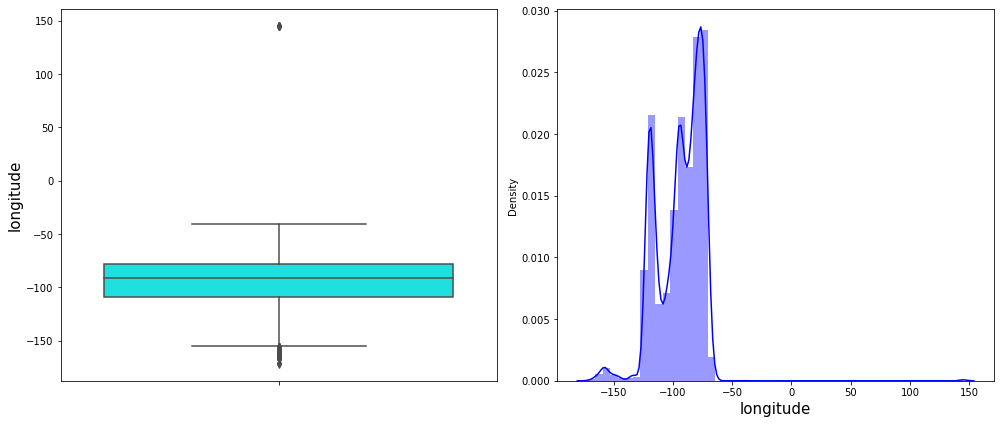

In [19]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=GP,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(GP['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

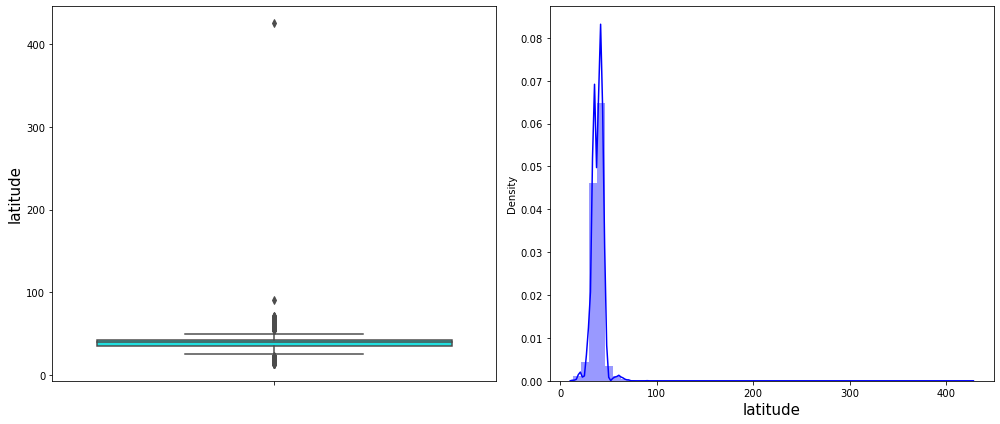

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=GP,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(GP['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

In [21]:
# Missing Value Imputation of geolocation with mode
GP['geolocation_source'] = GP['geolocation_source'].fillna(GP['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
GP['longitude'] = GP['longitude'].fillna(GP['longitude'].median())
# Missing Value Imputation of latitude with mean
GP['latitude'] = GP['latitude'].fillna(GP['latitude'].mean())

In [22]:
#Finding what percentage of data is missing from the dataset
missing_values = GP.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(GP))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                      10449       87.961950
generation_gwh_2013               5408       45.525718
generation_gwh_2014               5026       42.309959
generation_gwh_2015               4604       38.757471
generation_gwh_2016               3917       32.974156
generation_gwh_2017               3326       27.998990
generation_gwh_2018               2774       23.352134
generation_gwh_2019               2102       17.695092
commissioning_year                2050       17.257345
primary_fuel                      2004       16.870107
generation_data_source            1810       15.236973
name                                 0        0.000000
capacity_mw                          0        0.000000
source                               0        0.000000
longitude                            0        0.000000
latitude                             0        0.000000
geolocation_source                   0        0.000000


In [23]:
GP.describe()

capacity_mw      latitude     longitude  commissioning_year  \
count  11879.000000  11879.000000  11879.000000         9829.000000   
mean     101.409492     38.908904    -93.971383         1998.252413   
std      317.976932      6.659509     19.359791           24.526561   
min        0.000000     13.303500   -171.712400         1896.000000   
25%        1.400000     35.060000   -108.813000         1988.000000   
50%        5.000000     39.487700    -90.805000         2009.000000   
75%       41.750000     42.467700    -78.485150         2016.000000   
max     6809.000000    425.246100    144.899900         2020.000000   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count          6471.000000          6853.000000          7275.000000   
mean            563.712786           527.240856           507.402362   
std            2046.088652          1993.935810          1911.766843   
min            -947.600000          -989.619000          -864.428000   
25%               1.565000             1.693000             1.798910   
50%              20.229000            16.153000            14.627000   
75%             180.141000           154.112000           142.897500   
max           31431.080000         32320.917000         32525.595000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
count          7962.000000          8553.000000          9105.000000   
mean            452.301744           421.502406           403.725956   
std            1805.075992          1747.420086          1692.573668   
min            -768.620000          -934.944000          -982.622000   
25%               1.765750             1.796000             1.876000   
50%              11.743000            10.667000             9.644000   
75%             121.876750           111.518000           108.415000   
max           32377.477000         32340.138000         31097.259000   

       generation_gwh_2019  
count          9777.000000  
mean            421.938592  
std            1692.852318  
min            -780.339000  
25%               2.659000  
50%              11.280130  
75%             120.862000  
max           31920.368000

# Regression Target feature - Capacity

In [24]:
print('Minimum Capacity of Powerplant:',GP.capacity_mw.min())
print('Maximum Capacity of Powerplant:',GP.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 6809.0


In [25]:
GP.loc[GP.capacity_mw==6809]

name  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
4192  Grand Coulee       6809.0   47.9575  -118.9773        Hydro         NaN   

      commissioning_year                                  source  \
4192         1967.470333  U.S. Energy Information Administration   

                          geolocation_source  generation_gwh_2013  \
4192  U.S. Energy Information Administration            21073.181   

      generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
4192            20261.569            18878.623            19011.492   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
4192             20983.99            21042.561            16639.421   

                      generation_data_source  
4192  U.S. Energy Information Administration

In [26]:
GP.loc[GP.capacity_mw==0]

name  capacity_mw  latitude  \
0                10 Briggs Solar NG  LLC (East)          0.0   41.6327   
2                    1001 Ebenezer Church Solar          0.0   36.2838   
3                           1008 Matthews Solar          0.0   36.2167   
4                             1009 Yadkin Solar          0.0   36.1475   
6                        1045 Tomlin Mill Solar          0.0   35.9162   
...                                         ...          ...       ...   
11852  Yorktown Battery Energy Storage Facility          0.0   34.0047   
11858                         Yum Yum Solar LLC          0.0   35.2525   
11868                 Zephyr Wind Project - 2.0          0.0   41.0931   
11876                       Zumbro Solar Garden          0.0   44.0460   
11877                                      Zuni          0.0   39.7373   

       longitude primary_fuel other_fuel1  commissioning_year  \
0       -71.4963          NaN         NaN                 NaN   
2       -80.8434          NaN         NaN                 NaN   
3       -80.5525          NaN         NaN                 NaN   
4       -80.6561          NaN         NaN                 NaN   
6       -80.8355          NaN         NaN                 NaN   
...          ...          ...         ...                 ...   
11852  -118.0684          NaN         NaN                 NaN   
11858   -89.2514          NaN         NaN                 NaN   
11868   -83.6378          NaN         NaN                 NaN   
11876   -92.7600          NaN         NaN                 NaN   
11877  -105.0170          NaN         NaN                 NaN   

                                       source  \
0      U.S. Energy Information Administration   
2      U.S. Energy Information Administration   
3      U.S. Energy Information Administration   
4      U.S. Energy Information Administration   
6      U.S. Energy Information Administration   
...                                       ...   
11852  U.S. Energy Information Administration   
11858  U.S. Energy Information Administration   
11868  U.S. Energy Information Administration   
11876  U.S. Energy Information Administration   
11877  U.S. Energy Information Administration   

                           geolocation_source  generation_gwh_2013  \
0      U.S. Energy Information Administration                  NaN   
2      U.S. Energy Information Administration                  NaN   
3      U.S. Energy Information Administration                  NaN   
4      U.S. Energy Information Administration                  NaN   
6      U.S. Energy Information Administration                  NaN   
...                                       ...                  ...   
11852  U.S. Energy Information Administration                  NaN   
11858  U.S. Energy Information Administration                  NaN   
11868  U.S. Energy Information Administration                  NaN   
11876  U.S. Energy Information Administration                  NaN   
11877  U.S. Energy Information Administration                  0.0   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                      NaN                  NaN                  NaN   
2                      NaN                  NaN                  NaN   
3                      NaN                  NaN                  NaN   
4                      NaN                  NaN                  NaN   
6                      NaN                  NaN                  NaN   
...                    ...                  ...                  ...   
11852                  NaN                  NaN                  NaN   
11858                  NaN                  NaN                  NaN   
11868                  NaN                  NaN                  NaN   
11876                  NaN                  NaN                  NaN   
11877                  0.0                  0.0                  NaN   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0     

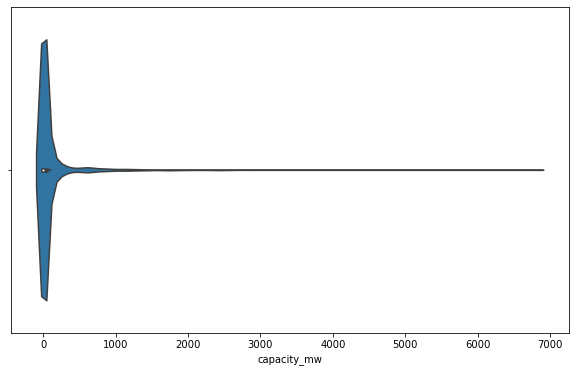

In [27]:
plt.figure(figsize=(10,6))
sns.violinplot(GP.capacity_mw)
plt.show()

In [28]:
GP.loc[GP.capacity_mw >1500].shape

(150, 17)

In [29]:
pd.crosstab(GP['capacity_mw'],GP["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

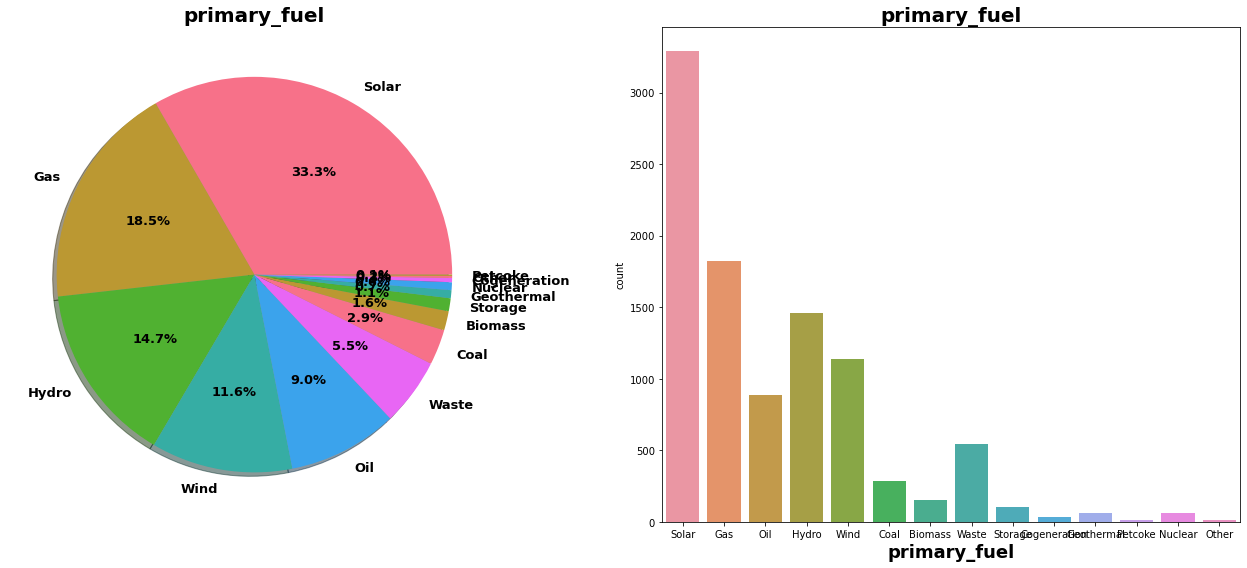

In [30]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
GP['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=GP,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

In [31]:
GP.primary_fuel.value_counts()

Solar           3291
Gas             1822
Hydro           1456
Wind            1141
Oil              886
Waste            545
Coal             286
Biomass          155
Storage          104
Geothermal        65
Nuclear           63
Cogeneration      34
Other             16
Petcoke           11
Name: primary_fuel, dtype: int64

In [32]:
print('Total Power Generation Capacity of all Power Plants:',GP['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 1204643.35 MW


In [33]:
GP["capacity_mw"].groupby(GP["primary_fuel"]).agg([sum])

sum
primary_fuel           
Biomass         5123.20
Coal          249149.10
Cogeneration    1042.00
Gas           546437.10
Geothermal      3889.20
Hydro         101658.90
Nuclear       104233.10
Oil            37195.70
Other            572.40
Petcoke         2361.60
Solar          37920.05
Storage          815.60
Waste           9768.50
Wind          104476.90

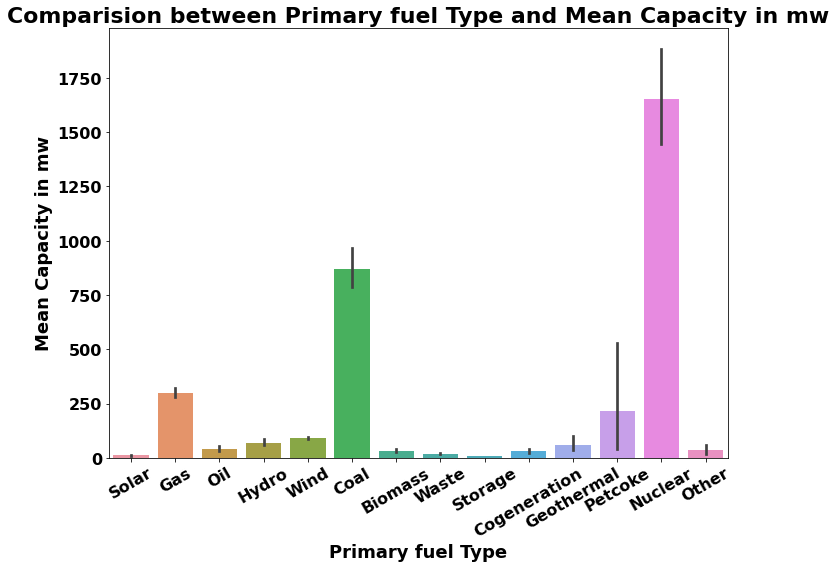

In [34]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = GP["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = GP)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

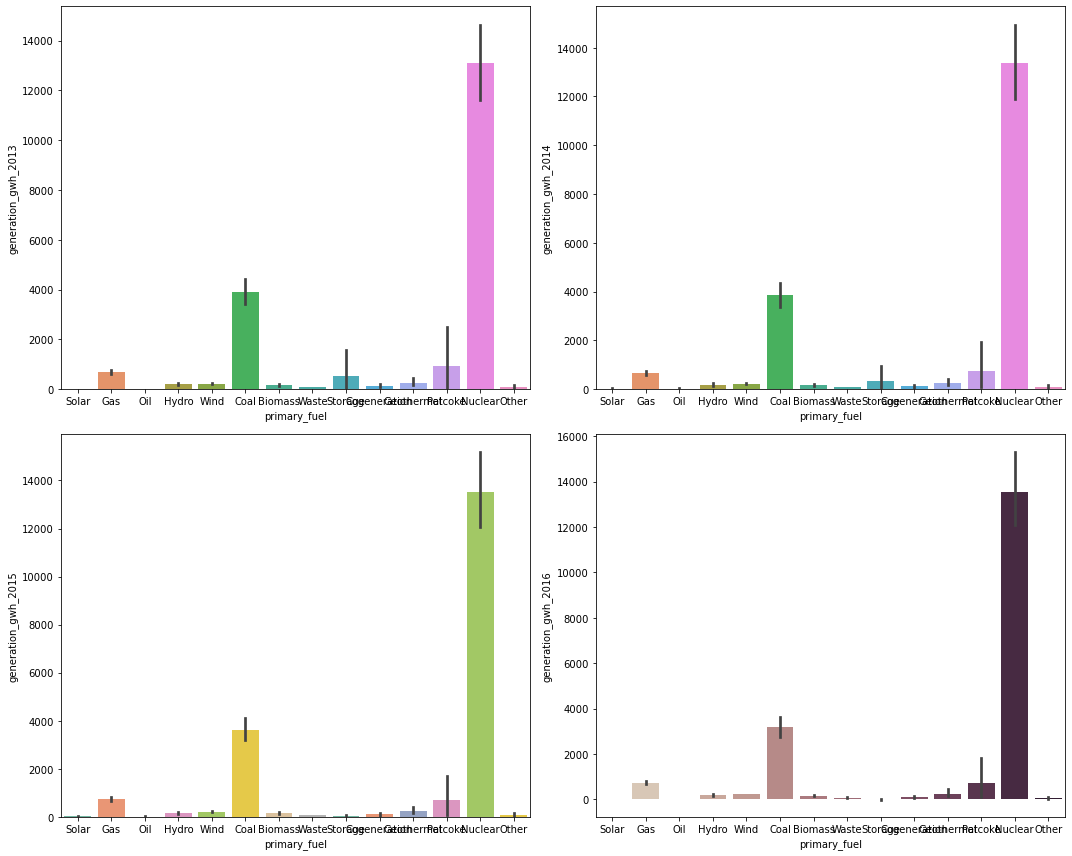

In [35]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=GP)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=GP)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=GP,palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=GP,palette="ch:.25")
plt.show()

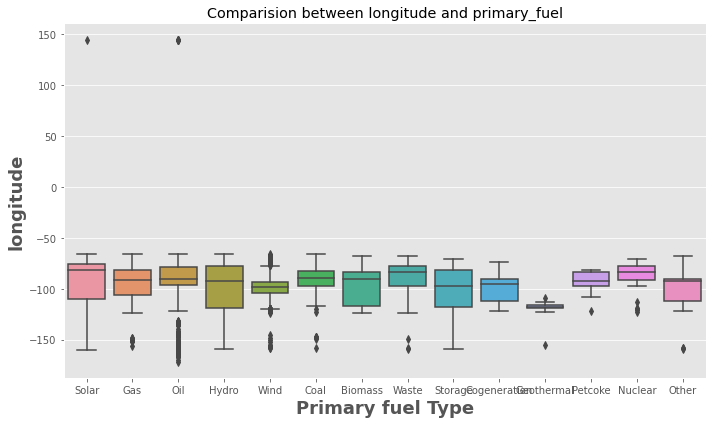

In [36]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(GP['primary_fuel'],GP["longitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

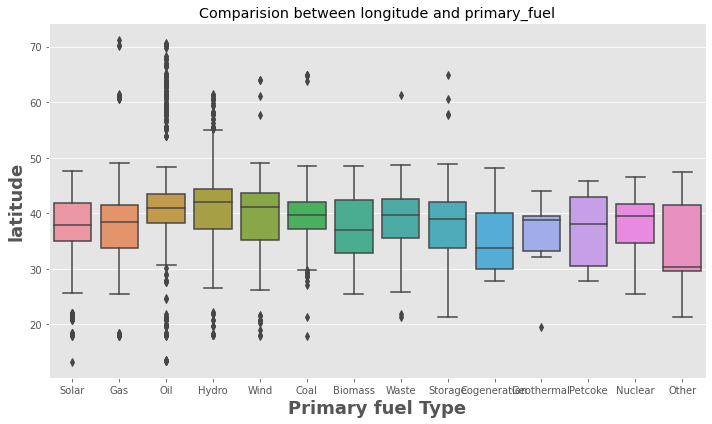

In [37]:
# Let's check how the primary_fuel is reated to Latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(GP['primary_fuel'],GP["latitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

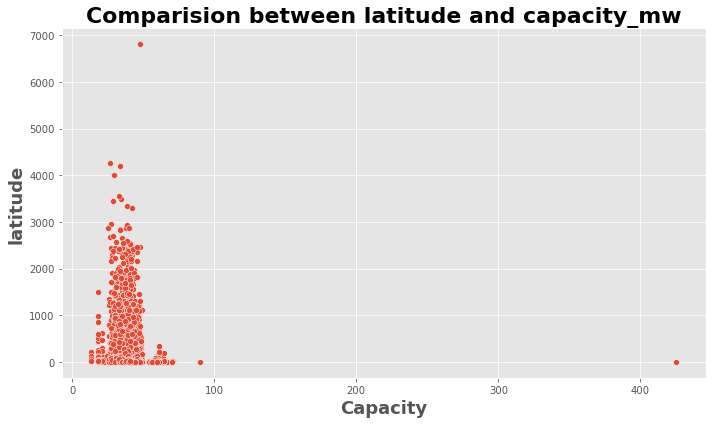

In [38]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.scatterplot(GP['latitude'],GP["capacity_mw"])
a.set_xlabel('Capacity',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

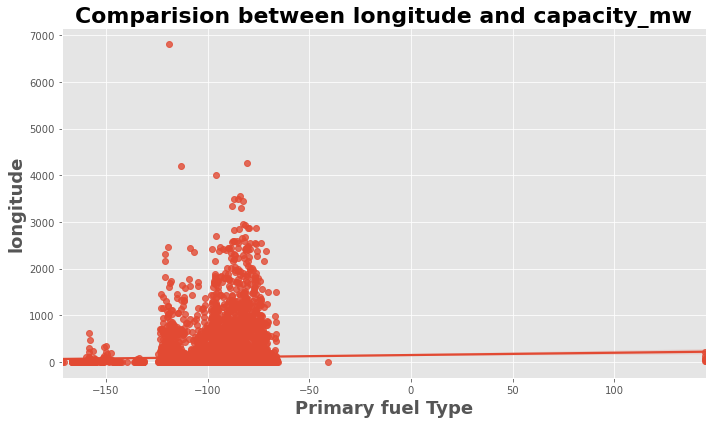

In [39]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.regplot(GP['longitude'],GP["capacity_mw"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

In [40]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2018
GP['Power_plant_age'] = 2018 - GP['commissioning_year']
GP.drop(columns=['commissioning_year'],inplace=True)

In [41]:
print('The oldest powerplant Age :',GP.Power_plant_age.max())
print('The youngest powerplant Age :',GP.Power_plant_age.min())

The oldest powerplant Age : 122.0
The youngest powerplant Age : -2.0


In [42]:
GP.loc[GP.Power_plant_age==122]

name  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
4218  Granite          2.0   40.6192  -111.7821        Hydro         NaN   

                                      source  \
4218  U.S. Energy Information Administration   

                          geolocation_source  generation_gwh_2013  \
4218  U.S. Energy Information Administration                5.671   

      generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
4218                 6.05                5.516                6.219   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
4218                7.476                 5.36                6.719   

                      generation_data_source  Power_plant_age  
4218  U.S. Energy Information Administration            122.0

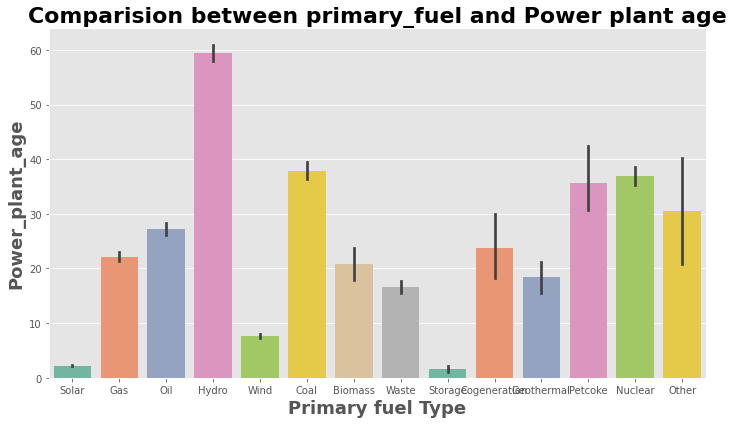

In [43]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = GP,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

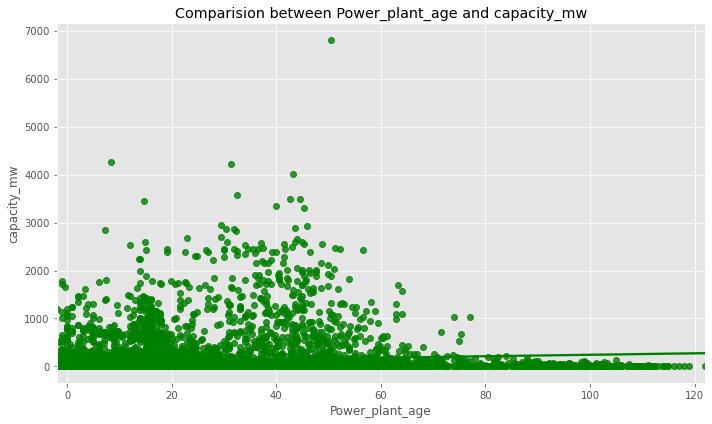

In [44]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(GP['Power_plant_age'],GP['capacity_mw'],color = "g")

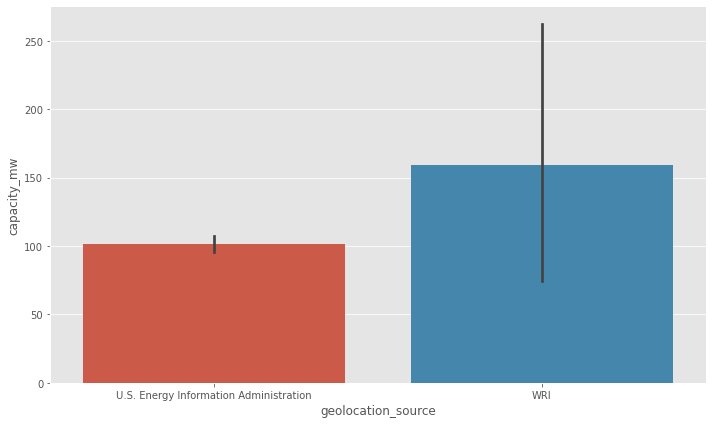

In [45]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = GP)
plt.show()

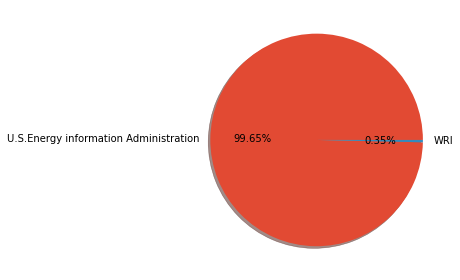

In [46]:
labels='U.S.Energy information Administration','WRI'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(GP['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

# Distribution of features

In [47]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

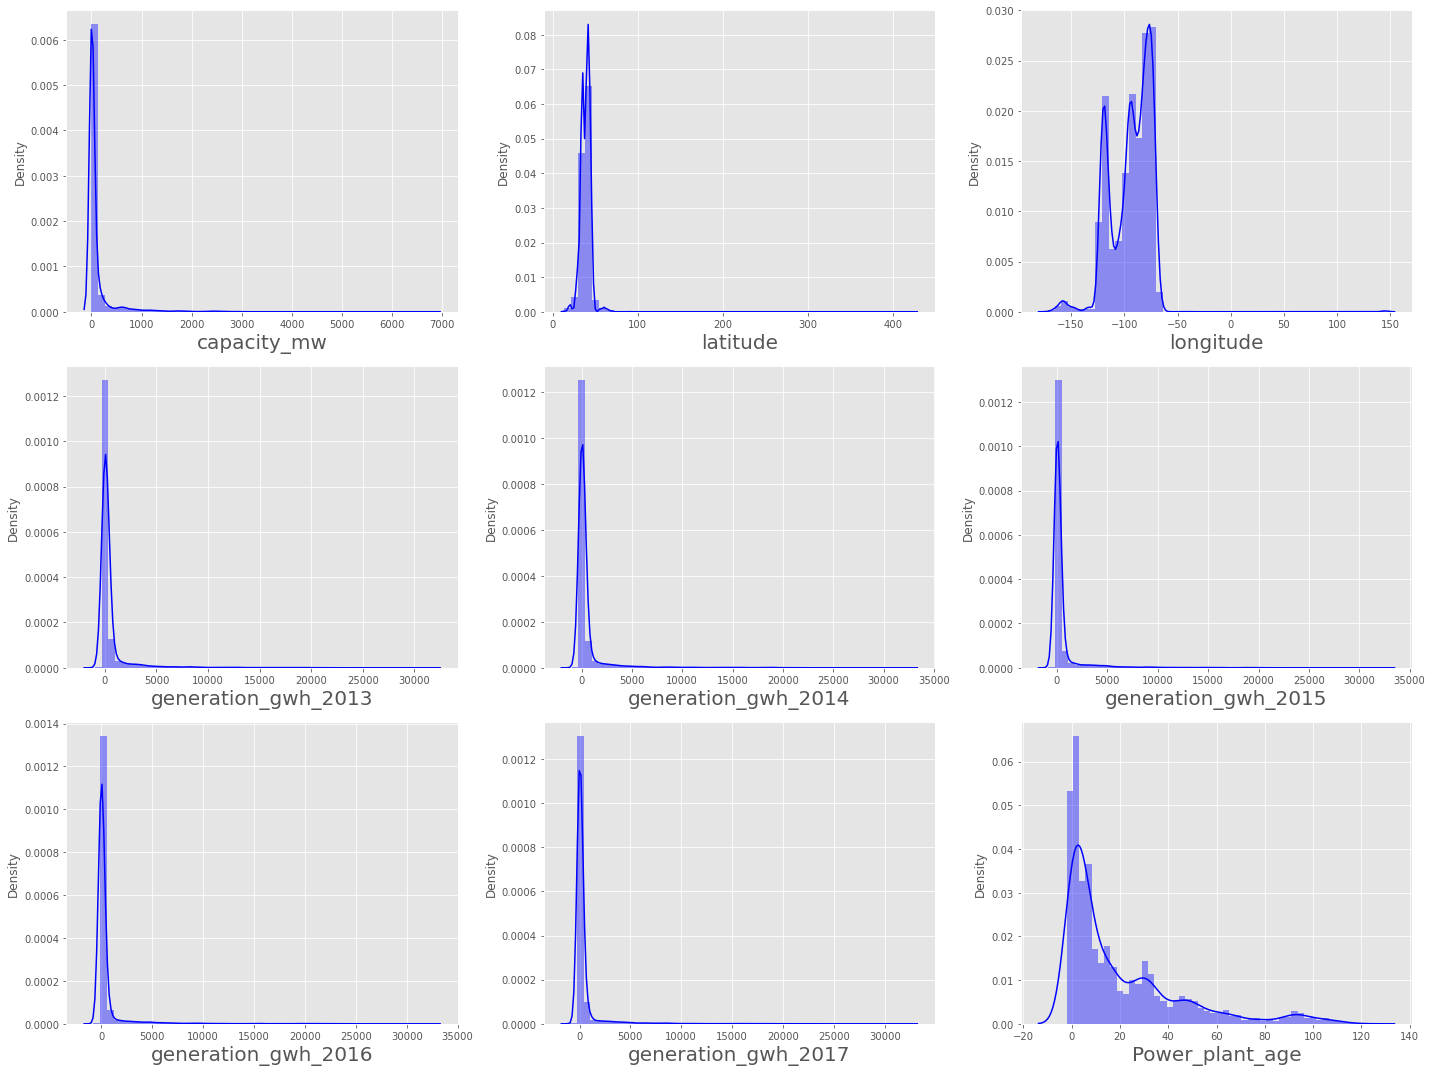

In [48]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(GP[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

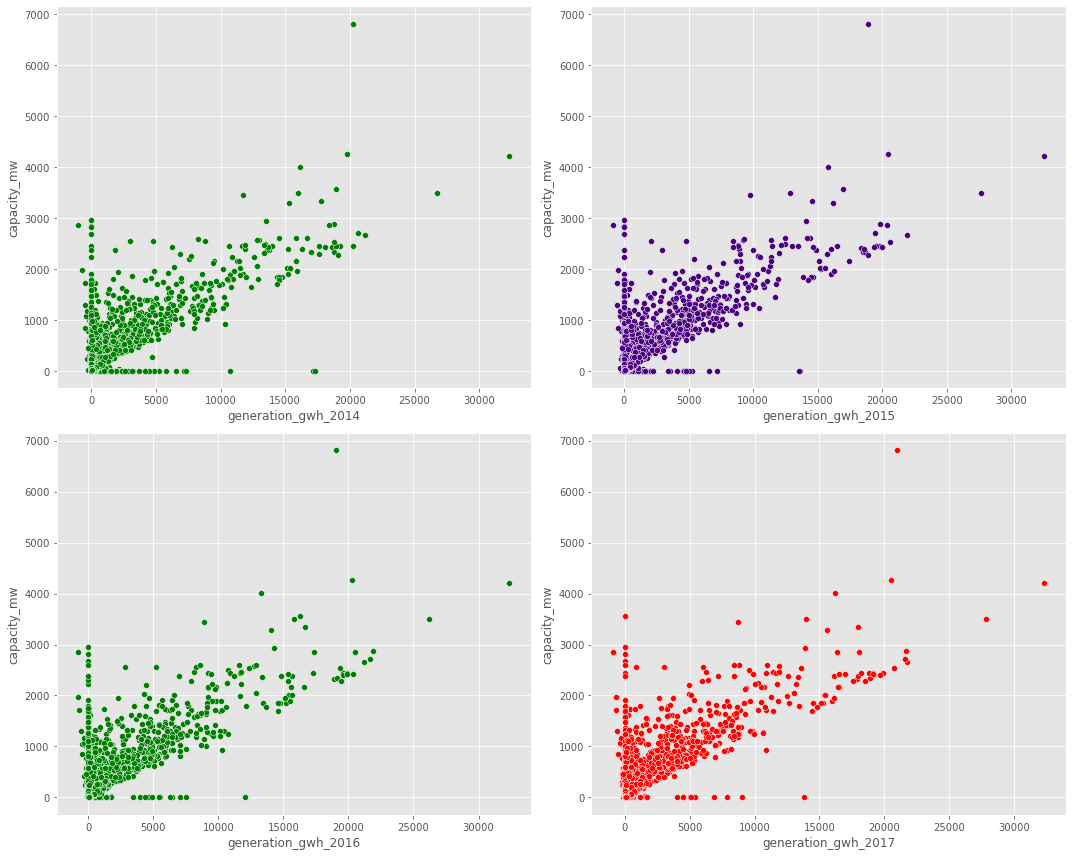

In [49]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=GP,color="g")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=GP,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=GP,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=GP,color="r")
plt.show()

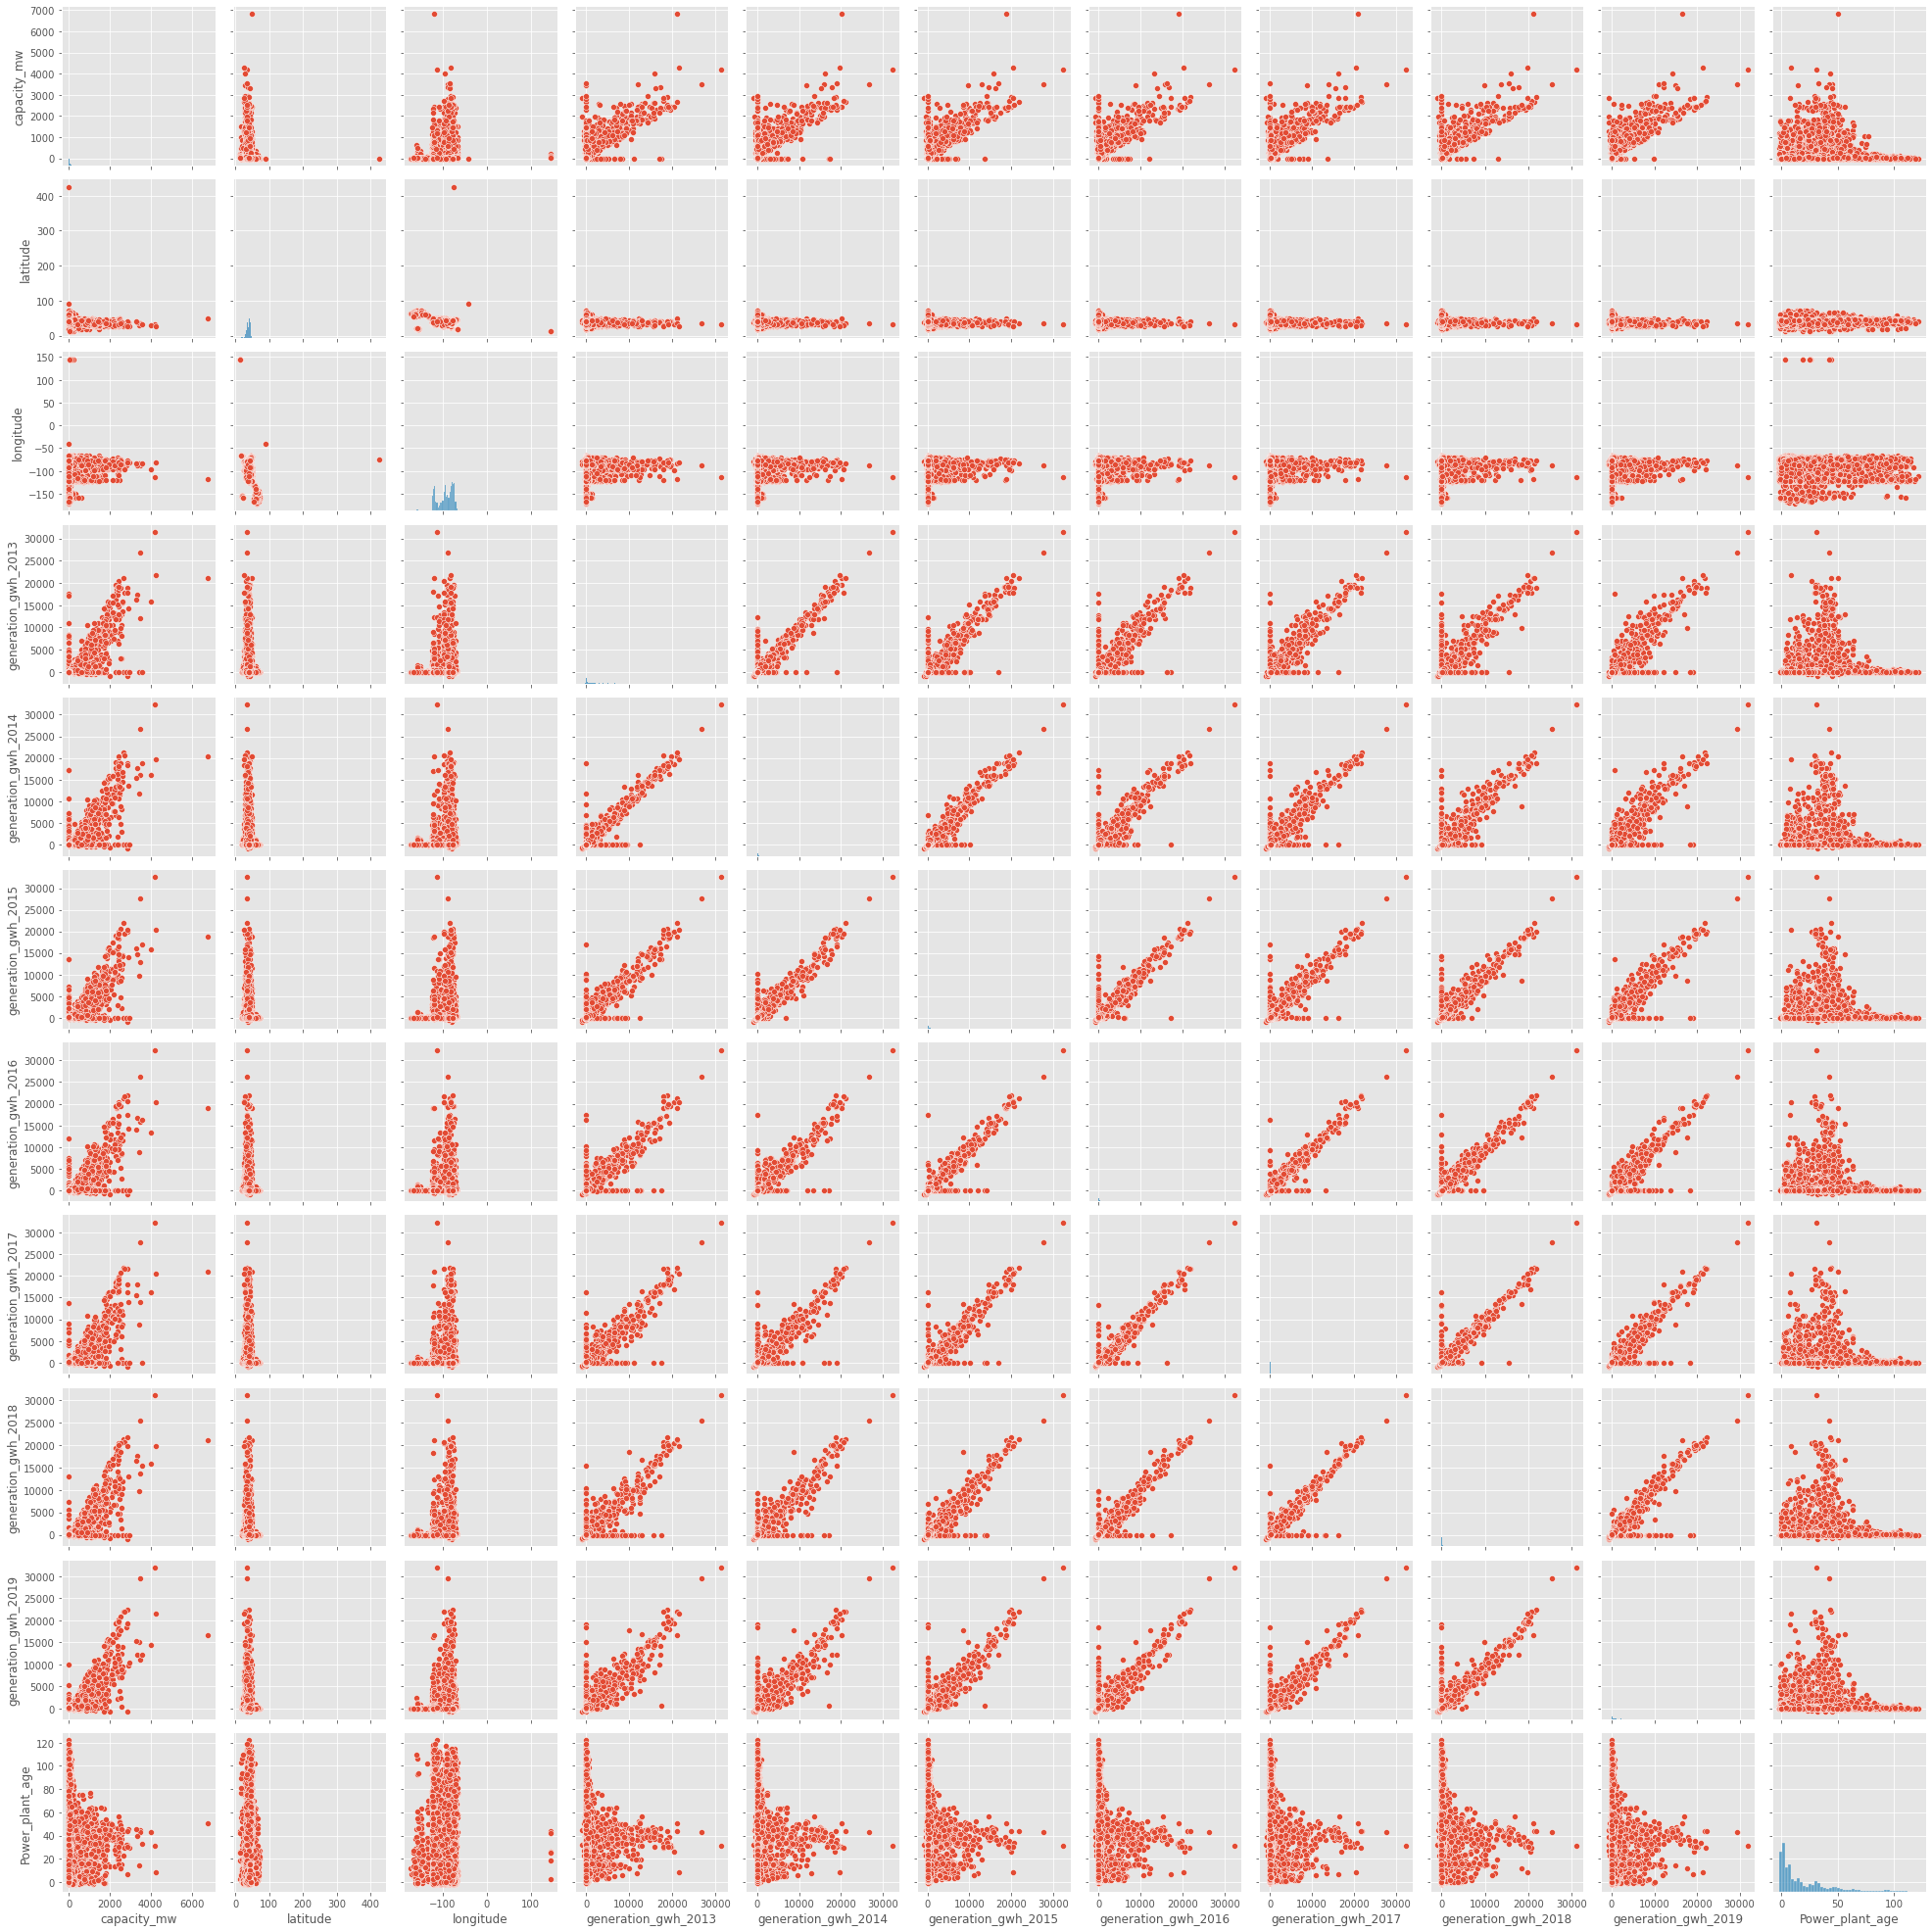

In [50]:
#Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(GP)

# Encoding categorical data

In [51]:
GP.drop(columns=['name'],axis=1,inplace=True)

In [52]:
GP.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [53]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [54]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    GP[i] = le.fit_transform(GP[i])
GP.head()

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  source  \
0          0.0   41.6327   -71.4963            14           12      12   
1          2.0   41.0930   -73.9828            10           12      12   
2          0.0   36.2838   -80.8434            14           12      12   
3          0.0   36.2167   -80.5525            14           12      12   
4          0.0   36.1475   -80.6561            14           12      12   

   geolocation_source  generation_gwh_2013  generation_gwh_2014  \
0                   0                  NaN                  NaN   
1                   0                  NaN                  NaN   
2                   0                  NaN                  NaN   
3                   0                  NaN                  NaN   
4                   0                  NaN                  NaN   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   generation_gwh_2018  generation_gwh_2019  Power_plant_age  
0                  NaN                  NaN              NaN  
1                  NaN                2.467              2.0  
2                  NaN                  NaN              NaN  
3                  NaN                  NaN              NaN  
4                  NaN                  NaN              NaN

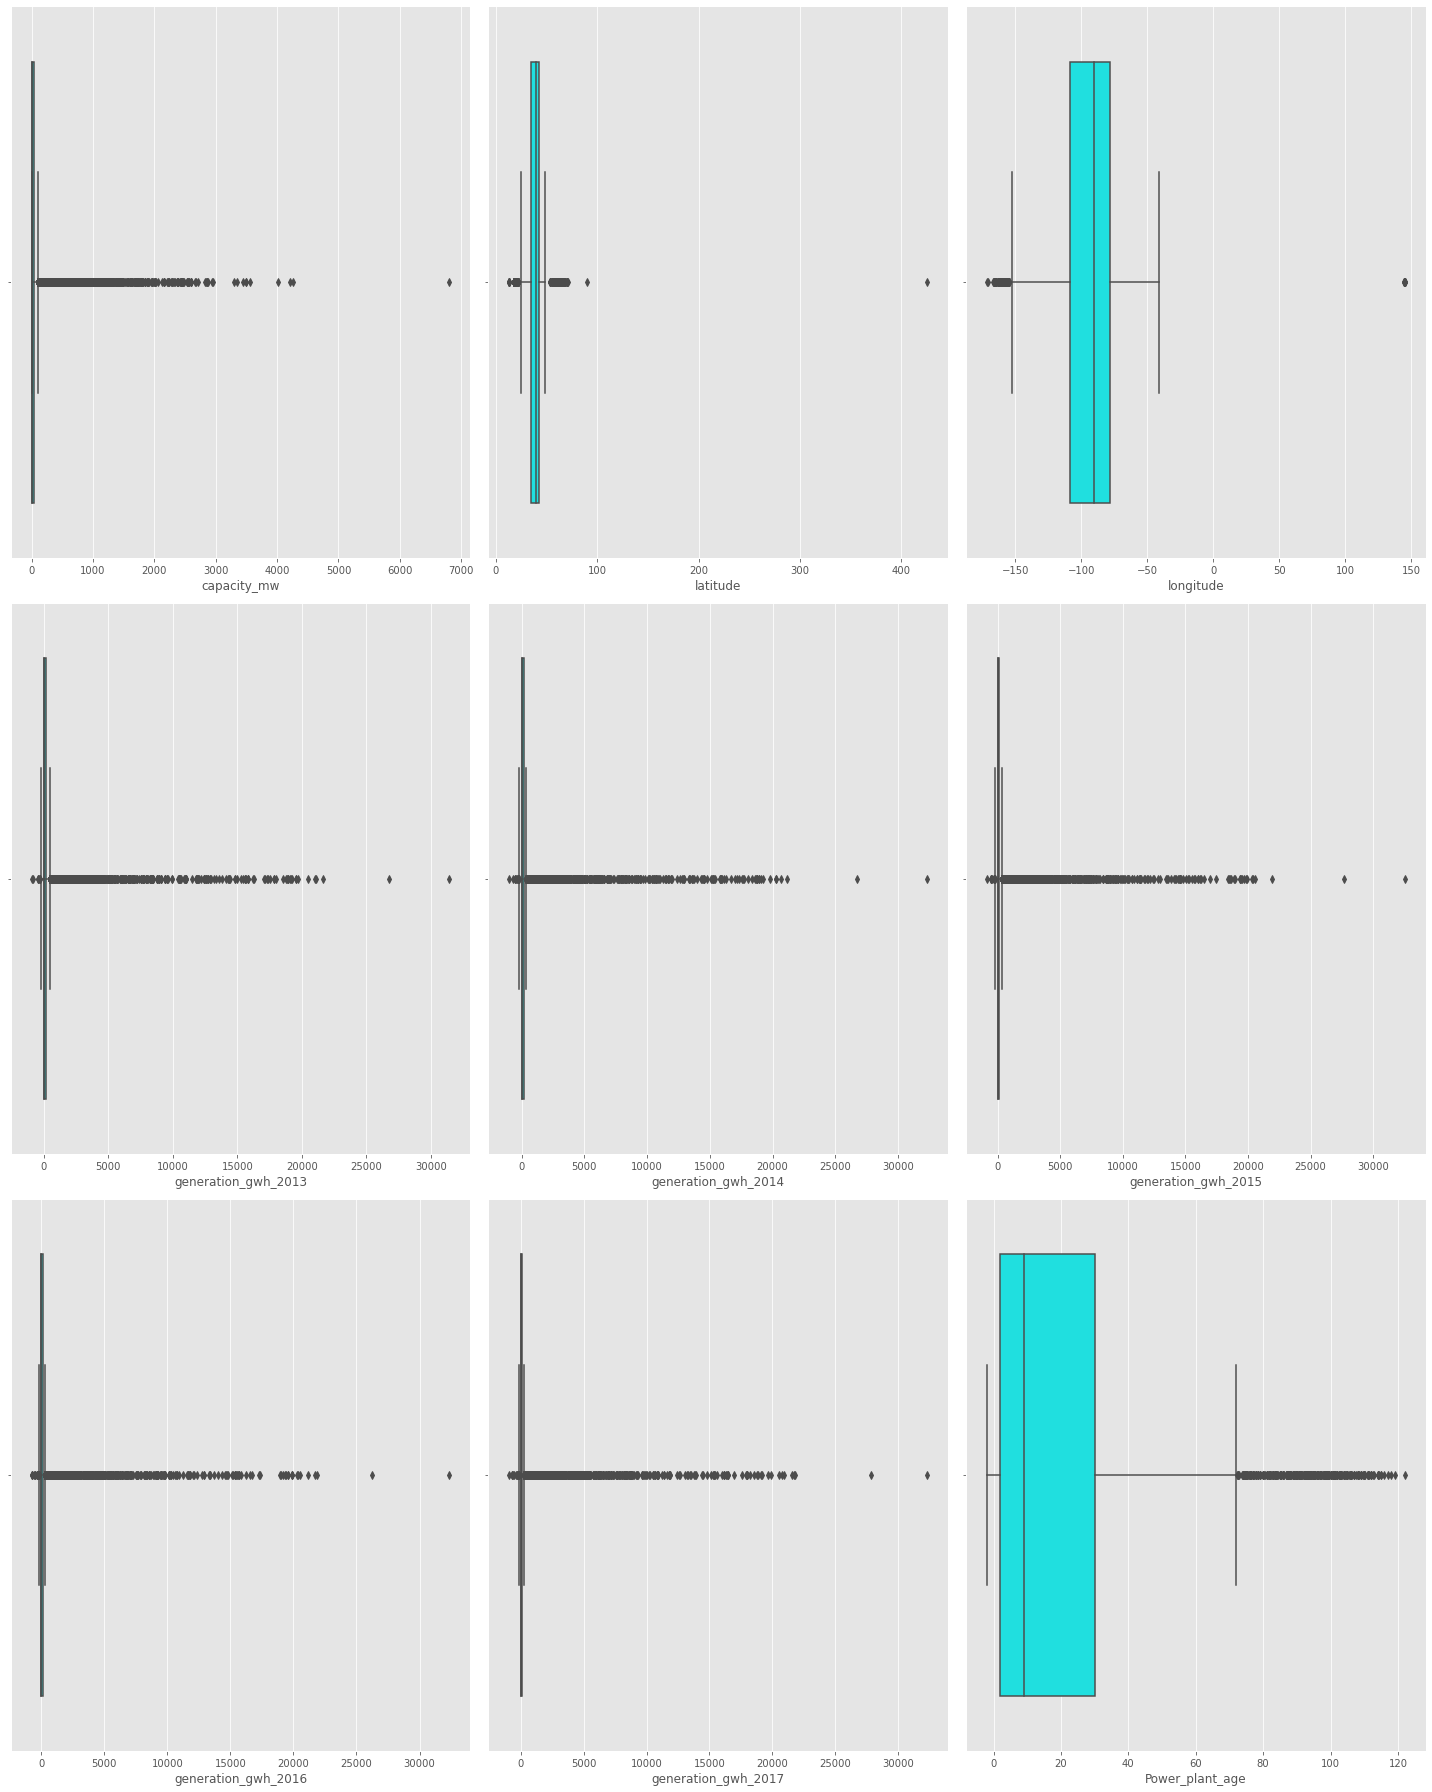

In [55]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(GP[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [56]:
# Removal of unnessary columns
GP.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [57]:
GP2=GP.copy

In [58]:
GP3=GP.copy()
Q1 = GP3.quantile(0)
Q3= GP3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             115.030000
latitude                 30.716470
longitude                96.660860
primary_fuel             14.000000
other_fuel1              12.000000
generation_gwh_2013    1398.570500
generation_gwh_2014    1392.061800
generation_gwh_2015    1250.902499
generation_gwh_2016    1128.786650
generation_gwh_2017    1260.298200
generation_gwh_2018    1302.676000
generation_gwh_2019    1124.443400
Power_plant_age          46.000000
dtype: float64


In [59]:
data = GP3[~((GP3 < (Q1 - 1.5 * IQR)) |(GP3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(10843, 13)


In [60]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


Correlation matrix

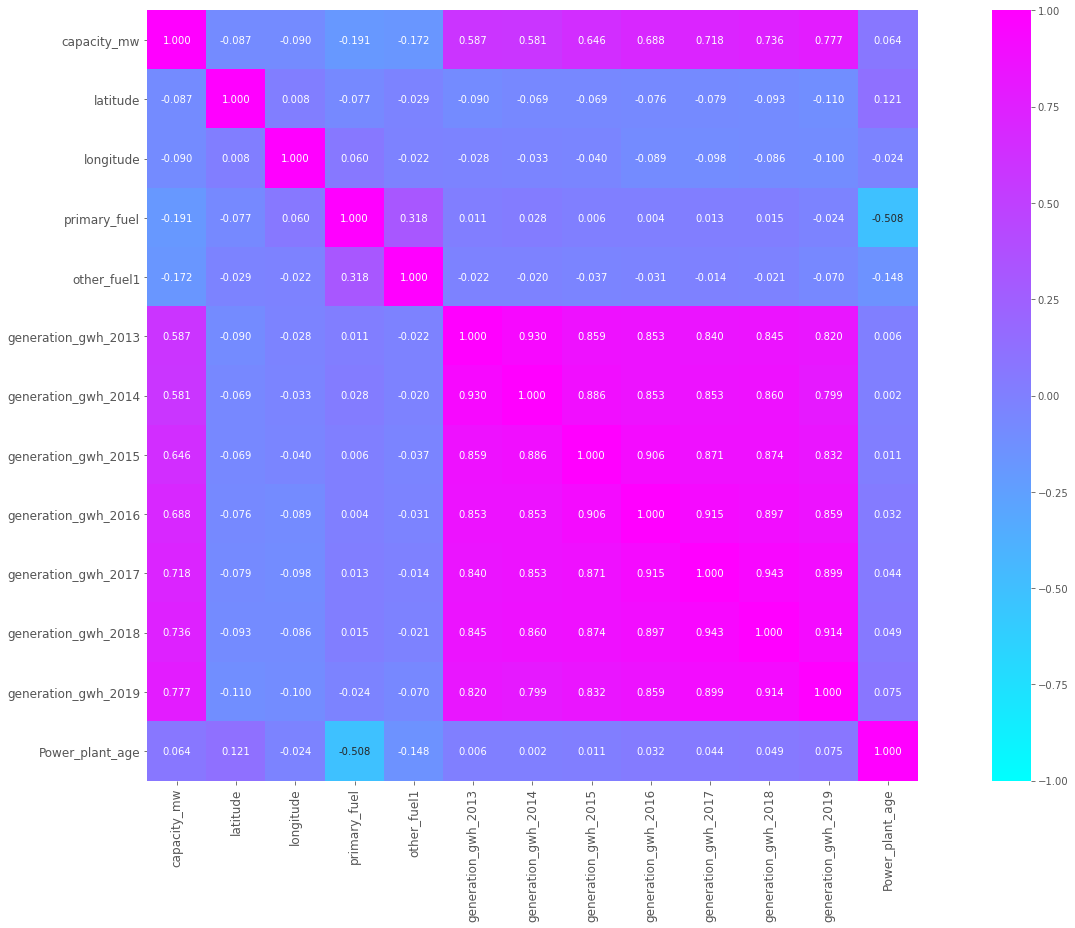

In [61]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

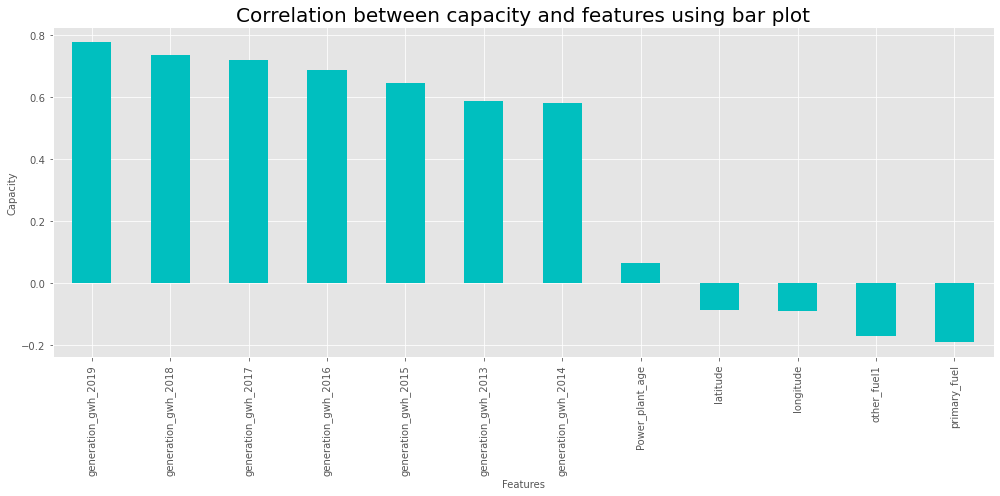

In [62]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

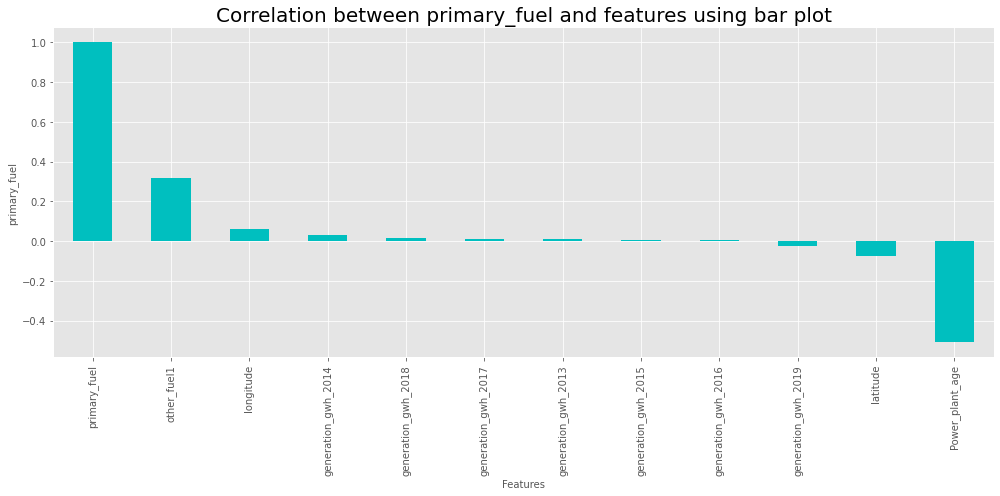

In [63]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

In [64]:
data.skew()

capacity_mw            2.730895
latitude               0.397861
longitude             -0.809987
primary_fuel          -0.460298
other_fuel1           -3.060098
generation_gwh_2013    3.993474
generation_gwh_2014    4.195426
generation_gwh_2015    3.993129
generation_gwh_2016    3.586693
generation_gwh_2017    3.607576
generation_gwh_2018    3.625264
generation_gwh_2019    3.621922
Power_plant_age        1.761703
dtype: float64

In [65]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [66]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

longitude  other_fuel1  generation_gwh_2013  generation_gwh_2014  \
0   1.503901     0.328551                  NaN                  NaN   
1   1.260348     0.328551                  NaN                  NaN   
2   0.672444     0.328551                  NaN                  NaN   
3   0.695163     0.328551                  NaN                  NaN   
4   0.687051     0.328551                  NaN                  NaN   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   Power_plant_age  
0              NaN  
1        -0.675842  
2              NaN  
3              NaN  
4              NaN

In [67]:
# checking skewness after using yeo-johnson
data.skew()

capacity_mw            2.730895
latitude               0.397861
longitude             -0.074684
primary_fuel          -0.460298
other_fuel1           -2.722285
generation_gwh_2013   -5.905023
generation_gwh_2014   -4.749440
generation_gwh_2015   -4.676093
generation_gwh_2016   -6.198020
generation_gwh_2017   -5.886201
generation_gwh_2018    3.625264
generation_gwh_2019    3.621922
Power_plant_age       -0.027803
dtype: float64

In [68]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)

Since we have done with EDA NOW its time for removal of missing data

In [69]:
data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

# Machine Learning Model Building Classification

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

Standard Scaling

In [71]:
# Splitting data in target and dependent feature
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [72]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (7590, 6)
Training target vector size: (7590,)
Test feature matrix size: (3253, 6)
Test target vector size: (3253,)


Finding best Random state

In [74]:
X

capacity_mw  latitude  longitude  generation_gwh_2018  \
0              0.0   41.6327   1.503901                  NaN   
1              2.0   41.0930   1.260348                  NaN   
2              0.0   36.2838   0.672444                  NaN   
3              0.0   36.2167   0.695163                  NaN   
4              0.0   36.1475   0.687051                  NaN   
...            ...       ...        ...                  ...   
11874          3.4   42.8869   0.990478                2.630   
11875          1.0   44.3195  -0.120544                1.161   
11876          0.0   44.0460  -0.125719                  NaN   
11877          0.0   39.7373  -0.742711                  NaN   
11878          9.8   40.5606  -1.030559               75.228   

       generation_gwh_2019  Power_plant_age  
0                      NaN              NaN  
1                  2.46700        -0.675842  
2                      NaN              NaN  
3                      NaN              NaN  
4                      NaN              NaN  
...                    ...              ...  
11874              1.21100        -0.214692  
11875              1.58900        -1.157810  
11876                  NaN              NaN  
11877                  NaN              NaN  
11878             72.06506        -0.383838  

[10843 rows x 6 columns]

In [75]:
X.dropna(inplace=True)

In [76]:
X

capacity_mw  latitude  longitude  generation_gwh_2018  \
9              1.9   40.2003   1.204843                2.207   
10             2.0   42.0761   1.511392                2.195   
11             1.3   33.7943  -1.253278                2.139   
12             3.8   40.5358   1.222028                4.626   
13             4.2   41.9084   0.098049                0.272   
...            ...       ...        ...                  ...   
11872          7.0   42.4803   0.172221               30.495   
11873         18.0   38.2803   0.317750               -0.073   
11874          3.4   42.8869   0.990478                2.630   
11875          1.0   44.3195  -0.120544                1.161   
11878          9.8   40.5606  -1.030559               75.228   

       generation_gwh_2019  Power_plant_age  
9                  2.34900        -0.214692  
10                 2.30300        -0.214692  
11                 1.78101        -0.133749  
12                 5.01000        -0.133749  
13                 0.02400         0.453114  
...                    ...              ...  
11872             22.64700         0.327356  
11873             -0.04500         1.258438  
11874              1.21100        -0.214692  
11875              1.58900        -1.157810  
11878             72.06506        -0.383838  

[7955 rows x 6 columns]

Logistics Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Crossvalidation

In [ ]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')

# Hyper Parameter Tuning : GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [ ]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

In [ ]:
GCV.best_params_

# Final Classification Model

In [ ]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

In [ ]:
y_prob = Final_mod.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

In [ ]:
import scikitplot as sktplt

In [ ]:
pip install  scikitplot

In [ ]:
from sklearn import metrics
class_names = df.columns
metrics.plot_confusion_matrix(Final_mod, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

Saving Model

In [ ]:
import joblib
joblib.dump(Final_mod,'powerplant_classification_Final.pkl')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [ ]:
GP2=GP.copy()

In [ ]:
GP3=GP2.copy()
Q1 = GP3.quantile(0)
Q3= GP3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

In [ ]:
data = GP3[~((GP3 < (Q1 - 1.5 * IQR)) |(GP3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

In [ ]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

In [ ]:

# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [ ]:
data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

# Standard Scaling

In [ ]:
# Splitting data in target and dependent feature
X = data.drop(['capacity_mw'], axis =1)
Y = data['capacity_mw']

In [78]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=91, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Applying other ML Models

In [ ]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')

In [ ]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'criterion':['mse','mae'],'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}

In [ ]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose = 5)

In [ ]:
GCV.fit(X_train,Y_train)

In [ ]:
GCV.best_params_

# Final Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=80 ,criterion = 'mse', max_depth= 40, max_features = 'sqrt',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')

In [ ]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Final Regression Saving Model

In [90]:
import joblib
joblib.dump(Final_mod,'Powerplant_regression_Final.pkl')

['Powerplant_regression_Final.pkl']